In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузим базу данных и проведем её анализ

In [2]:
df_movies = pd.read_csv('/Users/rtt/DataScience/Basa_films.csv', sep = ',')
df_movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
# какие колонки присутствуют в данной базе данных
df_movies.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [4]:
# выведем общую информацию
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
#Null Count -это ненулевые значения в колонках для переменных, 5 колонок с вещественными числами, 9-с объектами, 1 - целые числа,
#по книгам каких авторов снимают фильмы(writers), но нужны только уникальные значения, а не вся колонка с повторами

df_movies['writer'].unique()

array(['Stephen King', 'Henry De Vere Stacpoole', 'Leigh Brackett', ...,
       'Lynno Lovert', 'James Randall', 'Pereko Mosia'], dtype=object)

In [6]:
# для того, чтобы структурировать фильмы по рейтингу узнаем какие рейтинге вообще есть в базе данных

df_movies['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

G (general audiences) - Нет возрастных ограничений, PG (parental guidance suggested)- желательно присутствие родителей, R (restricted, no children under 17 allowed without parents or adult guardians) - Лица, не достигшие 16-летнего возраста, допускаются на сеанс только в присутствии родителей, 'X' (no one under 17 admitted) -  На сеанс не допускаются лица, не достигшие 17-летнего возраста, NC-17 rating (which stands for no one 17 and under admitted) -Лицам до 18 лет просмотр запрещен, PG-13- Детям до 13 лет просмотр не желателен, TV-14- для детей после 14 лет, TV-MA - не подходят для просмотра молодыми людьми в возрасте до 17 или 18 лет, TV-PG- Эта программа содержит материалы, которые родители могут счесть неподходящими для младшие дети. Рекомендуется родительский контроль.

В таблице не очень понятные рейтинги, поэтому сделаем функцию, которая будет ставить соответствующее значение в ячейке для буквы rating

In [7]:
def get_rating_cat(rating):
    if rating == 'G':
        return 'Нет возрастных ограничений'
    elif rating == 'PG':
        return 'Желательно присутствие родителей'
    elif rating == 'R':
        return 'Лица, не достигшие 16-летнего возраста, допускаются на сеанс только в присутствии родителей'
    elif rating == 'X':
        return 'На сеанс не допускаются лица, не достигшие 17-летнего возраста'
    elif rating == 'NC-17':
        return 'Лицам до 18 лет просмотр запрещен'
    elif rating == 'PG-13':
        return 'Детям до 13 лет просмотр не желателен'
    elif rating == 'TV-14':
        return 'для детей после 14 лет'
    elif rating == 'TV-MA':
        return 'не подходят для просмотра молодыми людьми в возрасте до 17 или 18 лет'
    elif rating == 'TV-PG' or rating == 'PG':
        return 'Рекомендуется родительский контроль'
    elif rating == 'Approved':
        return 'Одобрен'
    else:
        return rating

In [8]:
df_movies['Category rating'] = df_movies['rating'].apply(get_rating_cat)
df_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"Лица, не достигшие 16-летнего возраста, допуск..."
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"Лица, не достигшие 16-летнего возраста, допуск..."
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Желательно присутствие родителей
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Желательно присутствие родителей
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"Лица, не достигшие 16-летнего возраста, допуск..."


In [9]:
df_movies['Семейный просмотр'] = np.where((df_movies['Category rating'] == 'Желательно присутствие родителей'),'Для семейного просмотра', 'Не для семейного просмотра')

In [11]:
df_movies['Category rating'] = pd.Categorical(df_movies['Category rating'])# сделаем категориальные переменные в новой колонке Category rating

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               7668 non-null   object  
 1   rating             7591 non-null   object  
 2   genre              7668 non-null   object  
 3   year               7668 non-null   int64   
 4   released           7666 non-null   object  
 5   score              7665 non-null   float64 
 6   votes              7665 non-null   float64 
 7   director           7668 non-null   object  
 8   writer             7665 non-null   object  
 9   star               7667 non-null   object  
 10  country            7665 non-null   object  
 11  budget             5497 non-null   float64 
 12  gross              7479 non-null   float64 
 13  company            7651 non-null   object  
 14  runtime            7664 non-null   float64 
 15  Category rating    7591 non-null   category
 16  Семейн

In [12]:
df_movies['Category rating']

0       Лица, не достигшие 16-летнего возраста, допуск...
1       Лица, не достигшие 16-летнего возраста, допуск...
2                        Желательно присутствие родителей
3                        Желательно присутствие родителей
4       Лица, не достигшие 16-летнего возраста, допуск...
                              ...                        
7663                                                  NaN
7664                                                  NaN
7665                                                  NaN
7666                                                  NaN
7667                                                  NaN
Name: Category rating, Length: 7668, dtype: category
Categories (12, object): ['Not Rated', 'Unrated', 'Детям до 13 лет просмотр не желателен', 'Желательно присутствие родителей', ..., 'Одобрен', 'Рекомендуется родительский контроль', 'для детей после 14 лет', 'не подходят для просмотра молодыми людьми в в...]

У колонки есть 12 категорий наших фильмов Categories (12, object) и пустые значения(в дальнейшем их нужно будет заменить).
Сохраним нашу БД в расширении pickle, чтобы не потерять никакие данные

In [13]:
df_movies.to_pickle('/Users/rtt/DataScience/Goodfilms_for_family.pkl')

In [14]:
df = pd.read_pickle('/Users/rtt/DataScience/Goodfilms_for_family.pkl')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Желательно присутствие родителей,Для семейного просмотра
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Желательно присутствие родителей,Для семейного просмотра
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра


Все колонки сохранены,построим частотную таблицу для данных колонки 'Category rating', чтобы выяснить сколько раз каждая категория встречается и что чаще снимается в зарубежном кинематографе

In [15]:
df['Category rating'].value_counts(dropna = False)

Лица, не достигшие 16-летнего возраста, допускаются на сеанс только в присутствии родителей    3697
Детям до 13 лет просмотр не желателен                                                          2112
Желательно присутствие родителей                                                               1252
Not Rated                                                                                       283
Нет возрастных ограничений                                                                      153
NaN                                                                                              77
Unrated                                                                                          52
Лицам до 18 лет просмотр запрещен                                                                23
не подходят для просмотра молодыми людьми в возрасте до 17 или 18 лет                             9
Рекомендуется родительский контроль                                                               5


Сделаем вывод, что зарубежные фильмы снимаются в большинстве своем для взрослых лиц старше 16 лет и есть фильмы без рейтинга их (Not Rated) -283, пропущенные ячейки(NaN) -77, нет рейтинга (Unrated)- 52

Выясним, кто является самым популярным актером

In [16]:
df['star'].value_counts()

Nicolas Cage         43
Robert De Niro       41
Tom Hanks            41
Denzel Washington    37
Bruce Willis         34
                     ..
Schuyler Fisk         1
Liesel Matthews       1
James Cromwell        1
Suzanna Love          1
Siyabonga Mabaso      1
Name: star, Length: 2814, dtype: int64

В фильмах самым востребованным актером является Николас Кейдж

Выясним, сколько всего потратила каждая компания на съемки за все годы, представленные в БД

In [17]:
df.groupby('budget')['company'].sum()

budget
3000.0                      Pirromount Pictures
5000.0                             Notis Studio
6000.0                          Next Wave Films
7000.0                    Columbia PicturesERBP
10000.0                                Blustarr
                             ...               
275000000.0       LucasfilmWalt Disney Pictures
300000000.0    Walt Disney PicturesWarner Bros.
317000000.0                Walt Disney Pictures
321000000.0                      Marvel Studios
356000000.0                      Marvel Studios
Name: company, Length: 413, dtype: object

Выясним, сколько фильмов было снято в каждом году. 

In [18]:
df.groupby('year').size()

year
1980     92
1981    113
1982    126
1983    144
1984    168
1985    200
1986    200
1987    200
1988    200
1989    200
1990    200
1991    200
1992    200
1993    200
1994    200
1995    200
1996    200
1997    200
1998    200
1999    200
2000    200
2001    200
2002    200
2003    200
2004    200
2005    200
2006    200
2007    200
2008    200
2009    200
2010    200
2011    200
2012    200
2013    200
2014    200
2015    200
2016    200
2017    200
2018    200
2019    200
2020     25
dtype: int64

Можно увидеть что после 1984 года фильмо стали снимать около 200 штук ежегодно, и только в 2020 (год пандемии) есть просадка по кол-ву снятых фильмов

# Построим частотную визуализацию

[<BarContainer object of 2 artists>]

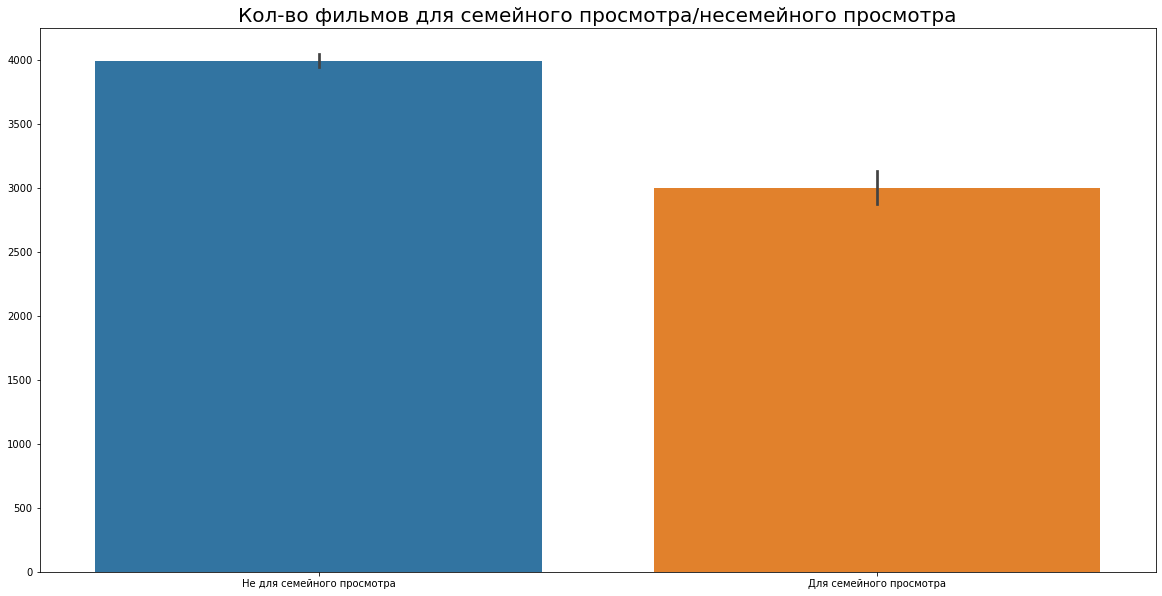

In [19]:
fig, ax = plt.subplots(figsize = (20,10))
plt.title('Кол-во фильмов для семейного просмотра/несемейного просмотра', fontsize = 20)
sns.barplot(y = df['Семейный просмотр'].index, x = df['Семейный просмотр'].values, alpha = 1)
ax.containers

Из данного графика видно, что больше фильмов снимается не для семейного просмотра

Далее рассмотрим, какие компании вкладываются в развитией фильмов для семейных посиделок, и сколько они в год сняли подобных фильмов

In [20]:
df.groupby(['year', 'Семейный просмотр', 'company'])['budget'].sum()

year  Семейный просмотр           company                  
1980  Для семейного просмотра     Alive Enterprises                    0.0
                                  Braun Entertainment Group            0.0
                                  Brooksfilms                          0.0
                                  Bryna Productions             12000000.0
                                  C.A.T. Films                   5000000.0
                                                                  ...     
2020  Не для семейного просмотра  Prowess Pictures                     0.0
                                  Pryor Entertainment                  0.0
                                  Roxwell Films                        0.0
                                  Universal Pictures             7000000.0
                                  Warner Bros.                 205000000.0
Name: budget, Length: 4931, dtype: float64

По данным результатам видно, что в категории "для семейного просмотра" наибольшие средства в производство фильмов вкладывает компания Bryna Productions, а в категории "не для семейного просмотра" такой компанией является Warner Bros. Также можно отметить, что некоторые компании вообще не вкладываются в развитие данных направлений.

Визуально покажем распределение бюджета на количество фильмов. 

[<BarContainer object of 10 artists>]

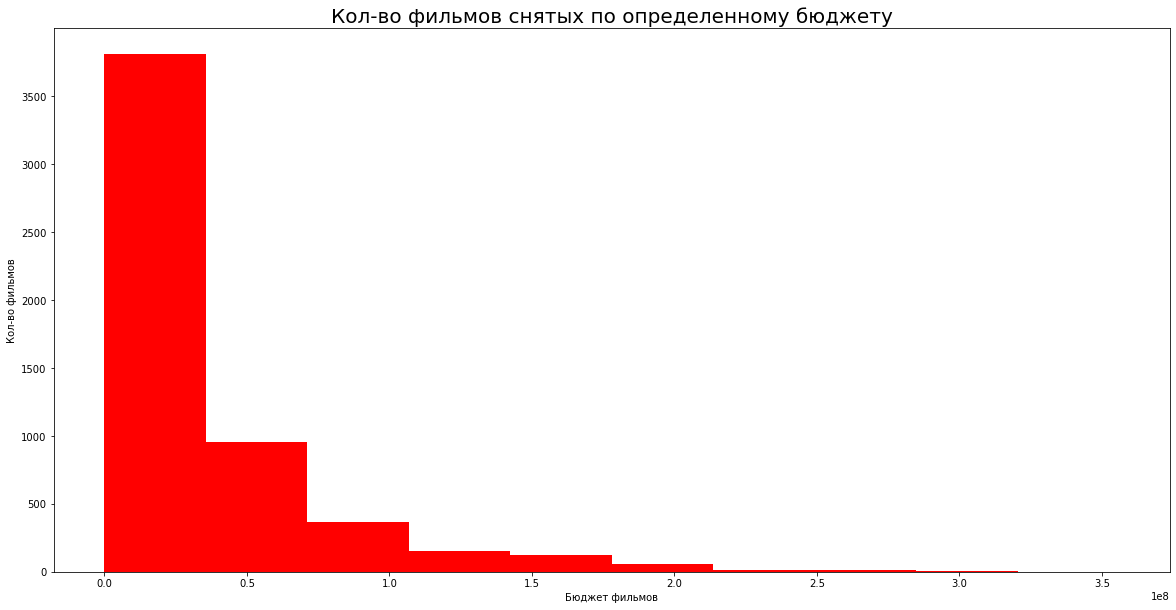

In [21]:
fig, ax = plt.subplots(figsize = (20,10))
plt.title('Кол-во фильмов снятых по определенному бюджету', fontsize = 20)
# df['budget'].hist(bins= 10,color = colors)
plt.hist(df['budget'], bins= 10, color = "red" )
plt.xlabel('Бюджет фильмов')
plt.ylabel('Кол-во фильмов')
ax.containers

Проработаем со столбцом score и выясним среднее значение баллов(score) фильмов в нашей базе

In [22]:
df['score'].mean()

6.390410958904098

Определим среднее значение длительности фильмов в нашей базе

In [23]:
df['runtime'].mean()

107.2616127348643

Определим медианное значение баллов для фильмов

In [24]:
df['score'].median()

6.5

Определеим медианное значение длительности для фильмов

In [25]:
df['runtime'].median()

104.0

В среднем можно сказать, что кино, снятое в знаменитых кинокомпаниях, длится около 1 часа 40 минут, а средняя оценка у него составляет 6.5

Найдем наиболее часто встречающeеся значение score для фильмов

In [26]:
df['score'].mode()

0    6.6
Name: score, dtype: float64

Получим, что наиболее часто встречающееся значение в "score" -6.6

Построим гистограмму распределения длительности фильмов

Text(0, 0.5, 'Количество фильмов')

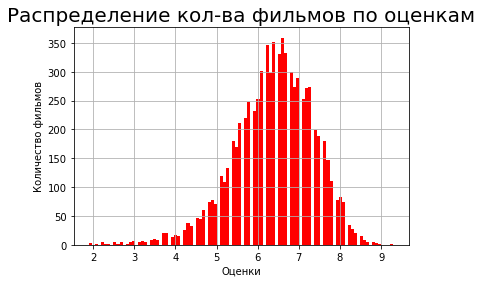

In [27]:
df['score'].hist(bins = 100, color = "red")
plt.title('Распределение кол-ва фильмов по оценкам', fontsize = 20)
plt.xlabel('Оценки')
plt.ylabel('Количество фильмов')

Из гистограммы мы видим подстверждение: средне арифметического значения оценки фильмов (чуть больше 350 фильмов имеют оценку 6.5 , крайние величины оценок -это 9 и 2)

In [28]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


Из данной таблицы мы можем посмотреть какое максимальное/минимальное значение чистой прибыли для фильмов было в БД, чистую прибыль максимальную/минимальную, максимальное/минимальное значение для баллов фильмов, год минимальный (1980)-где был снят первый фильм в нашей БД, максимальное значение(2020)-где был снят последний фильм для нашей БД, а максимальная длительность фильмов составляет около 366 минут, минимальная-55 минут, так же соотнести значение года и величину чистого дохода(gross) : 2000 год- 20 205 760 , а в 1980- 309 , 1991- 4 532 056-это помогает увидеть динамику увеличения дохода от фильмов

Рассмотрим, сколько в среднем компании тратили бюджета на съемку фильмов в год

In [29]:
df.groupby('year')['budget'].mean()

year
1980    1.210319e+07
1981    1.043309e+07
1982    1.130635e+07
1983    1.004467e+07
1984    1.226732e+07
1985    1.245418e+07
1986    1.252265e+07
1987    1.280132e+07
1988    1.301158e+07
1989    1.499800e+07
1990    1.834073e+07
1991    1.955386e+07
1992    1.976401e+07
1993    1.864826e+07
1994    2.519732e+07
1995    2.550240e+07
1996    2.878181e+07
1997    3.504097e+07
1998    3.665950e+07
1999    4.111549e+07
2000    3.889724e+07
2001    3.883313e+07
2002    3.662213e+07
2003    4.149956e+07
2004    4.428688e+07
2005    4.229114e+07
2006    4.363841e+07
2007    4.500325e+07
2008    4.352750e+07
2009    4.399123e+07
2010    4.666311e+07
2011    4.917956e+07
2012    4.771347e+07
2013    5.032093e+07
2014    4.573190e+07
2015    4.668233e+07
2016    5.526101e+07
2017    5.571203e+07
2018    4.904182e+07
2019    5.740129e+07
2020    5.753105e+07
Name: budget, dtype: float64

Проанализируем, какая была чистая прибыль в среднем у компаний в год

In [30]:
df.groupby('year')['gross'].mean()

year
1980    3.066256e+07
1981    2.423139e+07
1982    2.678639e+07
1983    2.148441e+07
1984    2.236134e+07
1985    2.085598e+07
1986    1.961028e+07
1987    2.145444e+07
1988    2.534233e+07
1989    3.220768e+07
1990    3.562427e+07
1991    3.191210e+07
1992    3.860088e+07
1993    4.067656e+07
1994    4.577235e+07
1995    4.796094e+07
1996    4.934436e+07
1997    6.589083e+07
1998    5.760837e+07
1999    6.928020e+07
2000    6.864352e+07
2001    7.808813e+07
2002    8.501718e+07
2003    8.830966e+07
2004    9.360874e+07
2005    8.933305e+07
2006    9.373905e+07
2007    1.019184e+08
2008    1.090561e+08
2009    1.166934e+08
2010    1.167000e+08
2011    1.248125e+08
2012    1.273810e+08
2013    1.299792e+08
2014    1.324574e+08
2015    1.344021e+08
2016    1.446942e+08
2017    1.424262e+08
2018    1.404264e+08
2019    1.547941e+08
2020    1.898866e+08
Name: gross, dtype: float64

Посмотрим, какая рейтинговая оценка в среднем была у компаний за год

In [31]:
df.groupby('year')['score'].mean()

year
1980    6.304348
1981    6.302655
1982    6.292063
1983    6.022917
1984    6.186905
1985    6.309500
1986    6.152500
1987    6.217000
1988    6.280000
1989    6.175500
1990    6.331000
1991    6.389500
1992    6.412500
1993    6.382000
1994    6.313000
1995    6.458000
1996    6.240000
1997    6.355500
1998    6.458500
1999    6.499500
2000    6.358000
2001    6.453000
2002    6.359000
2003    6.332500
2004    6.515000
2005    6.363000
2006    6.463000
2007    6.474000
2008    6.388500
2009    6.444500
2010    6.458000
2011    6.482500
2012    6.473000
2013    6.619000
2014    6.590000
2015    6.518500
2016    6.623000
2017    6.561500
2018    6.486000
2019    6.361000
2020    5.972727
Name: score, dtype: float64

Из данных можно увидеть что соотношение бюджетов фильмов к  чистой прибыли не изменилось, и так и осталось на уровне 1 к 2 , а вот средняя оценка фильмов к 2020 снижается

Найдем значение медианы для не семейного и семейного просмотров по годам

In [32]:
df.groupby(['year', 'Семейный просмотр'])['gross'].median()

year  Семейный просмотр         
1980  Для семейного просмотра        15298386.0
      Не для семейного просмотра     15198912.0
1981  Для семейного просмотра        16000000.0
      Не для семейного просмотра     12376625.0
1982  Для семейного просмотра        14000000.0
                                       ...     
2018  Не для семейного просмотра     31626386.0
2019  Для семейного просмотра       119620872.5
      Не для семейного просмотра     19636752.0
2020  Для семейного просмотра       193719180.5
      Не для семейного просмотра    166534027.0
Name: gross, Length: 82, dtype: float64

Из полученных данных видно, что если смотреть значение чистой прибыли у компании по годам, то прибыль увеличилась по обоим типам просмотров, но в 2019 чистая прибыль фильмов не для семейного просмотра сильно просела и практически в 10 раз ниже,  чем у фильмов для семейного просмотра, так же чистая прибыль в 10 раз больше стала у кинокомпаний если сравнивать 2020 и 1980 года

Найдем медианные значения для прибыли по годам

In [33]:
print(df.groupby('year')['gross'].agg(['median'])[0:5])
print(df.groupby('year')['gross'].agg(['median'])[36:])

          median
year            
1980  15198912.0
1981  14893933.5
1982  10278575.0
1983  10286449.0
1984   8360204.0
           median
year             
2016   48917728.5
2017   36469869.0
2018   36960410.0
2019   27526995.0
2020  166534027.0


Из базы данных было видно, что существуют такие жанры фильмов: 'Thriller', 'Adventure','Comedy', 'Family', нужно отфильтровать сколько фильмов было снято в этом жанре и какие оценки они имели, построим диаграммы

Text(0, 0.5, 'Кол-во фильмов')

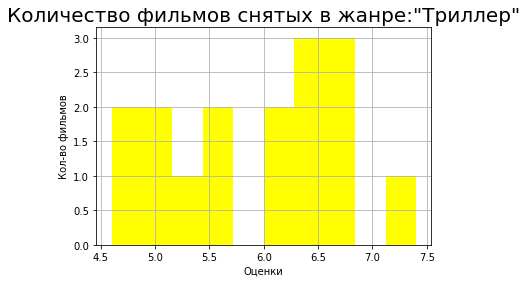

In [34]:
t1 = df[df['genre'] == 'Thriller']
t1['score'].hist(color = "yellow")
plt.title('Количество фильмов снятых в жанре:"Триллер"', fontsize = 20)
plt.xlabel('Оценки')
plt.ylabel('Кол-во фильмов')

In [35]:
t1['z-score']=scipy.stats.zscore(t1['score'])

C:\Users\rtt\AppData\Local\Temp\ipykernel_2676\3670493092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1['z-score']=scipy.stats.zscore(t1['score'])


In [36]:
t1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр,z-score
262,The Seduction,R,Thriller,1982,"January 29, 1982 (United States)",4.9,1100.0,David Schmoeller,David Schmoeller,Morgan Fairchild,United States,NaN,11378339.0,The Romantic Venture,104.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,-1.257212
430,The Lords of Discipline,R,Thriller,1983,"February 18, 1983 (United States)",6.6,2600.0,Franc Roddam,Pat Conroy,David Keith,United States,NaN,11787127.0,Paramount Pictures,102.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,0.853663
470,Cross Country,R,Thriller,1983,"November 18, 1983 (United States)",5.4,182.0,Paul Lynch,Herbert Kastle,Richard Beymer,Canada,2500000.0,NaN,Filmline Productions,95.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,-0.636367
754,Subway,R,Thriller,1985,"November 6, 1985 (United States)",6.6,14000.0,Luc Besson,Luc Besson,Christopher Lambert,France,NaN,390659.0,Les Films du Loup,104.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,0.853663
807,Defense of the Realm,PG,Thriller,1985,"November 21, 1986 (United States)",6.5,2100.0,David Drury,Martin Stellman,Gabriel Byrne,United Kingdom,NaN,750000.0,The Rank Organisation,96.0,Желательно присутствие родителей,Для семейного просмотра,0.729494


Text(0, 0.5, 'Кол-во фильмов')

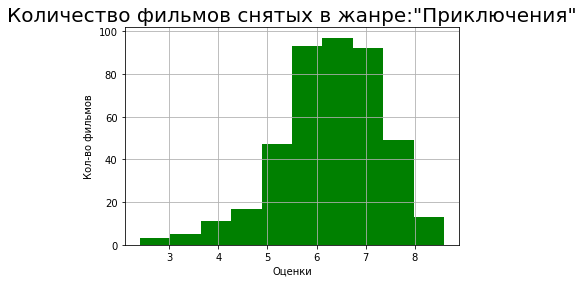

In [37]:
t2 = df[df['genre'] == 'Adventure']
t2['score'].hist(color = "green")
plt.title('Количество фильмов снятых в жанре:"Приключения"', fontsize = 20)
plt.xlabel('Оценки')
plt.ylabel('Кол-во фильмов')

In [38]:
t2['z-score']=scipy.stats.zscore(t2['score'])

C:\Users\rtt\AppData\Local\Temp\ipykernel_2676\3786348380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['z-score']=scipy.stats.zscore(t2['score'])


In [39]:
t2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр,z-score
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,-0.471040
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000.0,30031783.0,C.A.T. Films,109.0,Желательно присутствие родителей,Для семейного просмотра,0.966317
12,Popeye,PG,Adventure,1980,"December 12, 1980 (United States)",5.3,30000.0,Robert Altman,Jules Feiffer,Robin Williams,United States,20000000.0,49823037.0,Paramount Pictures,114.0,Желательно присутствие родителей,Для семейного просмотра,-0.950160
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000.0,3484523.0,Partisan Productions,219.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,0.487198
60,Herbie Goes Bananas,G,Adventure,1980,"June 25, 1980 (United States)",5.0,5300.0,Vincent McEveety,Don Tait,Charles Martin Smith,United States,NaN,18000000.0,Walt Disney Productions,100.0,Нет возрастных ограничений,Не для семейного просмотра,-1.237631


Text(0, 0.5, 'Кол-во фильмов')

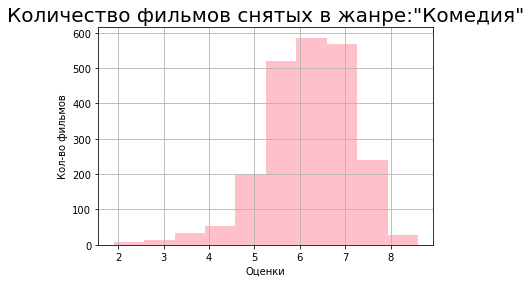

In [40]:
t3 = df[df['genre'] == 'Comedy']
t3['score'].hist(color = "pink")
plt.title('Количество фильмов снятых в жанре:"Комедия"', fontsize = 20)
plt.xlabel('Оценки')
plt.ylabel('Кол-во фильмов')

In [41]:
t3['z-score']=scipy.stats.zscore(t3['score'])

C:\Users\rtt\AppData\Local\Temp\ipykernel_2676\2587957713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t3['z-score']=scipy.stats.zscore(t3['score'])


In [42]:
t3.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр,z-score
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Желательно присутствие родителей,Для семейного просмотра,1.600253
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,1.175222
17,9 to 5,PG,Comedy,1980,"December 19, 1980 (United States)",6.9,29000.0,Colin Higgins,Patricia Resnick,Jane Fonda,United States,10000000.0,103300686.0,IPC Films,109.0,Желательно присутствие родителей,Для семейного просмотра,0.750192
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,0.643935
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,0.325162


Text(0, 0.5, 'Кол-во фильмов')

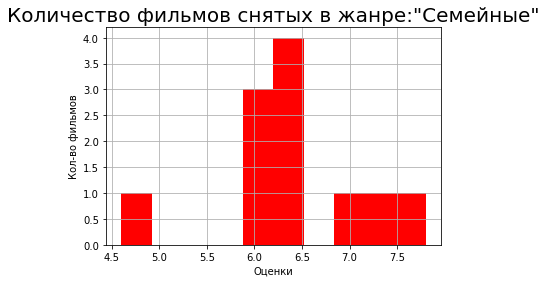

In [43]:
t = df[df['genre'] == 'Family']
t['score'].hist(color= "red")
plt.title('Количество фильмов снятых в жанре:"Семейные"', fontsize = 20)
plt.xlabel('Оценки')
plt.ylabel('Кол-во фильмов')

Если смотреть на данные этих фильмов, то можно увидеть что самые высокие оценки у комедий, семейные фильмы имеют низкие оценки и их снимают намного реже, чем все остальное. А наиболее снимаемые фильмы-это комедии в выборке из 4 жанров

# z-оценка

In [44]:
t['z-score']=scipy.stats.zscore(t['score'])

C:\Users\rtt\AppData\Local\Temp\ipykernel_2676\1428188456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['z-score']=scipy.stats.zscore(t['score'])


In [45]:
t.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр,z-score
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.3,5700.0,John Hough,Brian Clemens,Bette Davis,United States,NaN,5000000.0,Walt Disney Productions,84.0,Желательно присутствие родителей,Для семейного просмотра,-0.079178
209,E.T. the Extra-Terrestrial,PG,Family,1982,"June 11, 1982 (United States)",7.8,381000.0,Steven Spielberg,Melissa Mathison,Henry Thomas,United States,10500000.0,792910554.0,Universal Pictures,115.0,Желательно присутствие родителей,Для семейного просмотра,1.787166
723,D.A.R.Y.L.,PG,Family,1985,"June 14, 1985 (United States)",6.3,12000.0,Simon Wincer,David Ambrose,Mary Beth Hurt,United Kingdom,NaN,7840873.0,Paramount Pictures,99.0,Желательно присутствие родителей,Для семейного просмотра,-0.079178
798,One Magic Christmas,G,Family,1985,"November 22, 1985 (United States)",6.5,3400.0,Phillip Borsos,Thomas Meehan,Mary Steenburgen,Canada,NaN,13677222.0,Walt Disney Pictures,89.0,Нет возрастных ограничений,Не для семейного просмотра,0.169668
1029,Nutcracker,G,Family,1986,"November 26, 1986 (United States)",7.2,1000.0,Carroll Ballard,Kent Stowell,Hugh Duncan Bigney Mitchell,United States,NaN,781727.0,Hyperion Pictures,89.0,Нет возрастных ограничений,Не для семейного просмотра,1.040628


Объединим данные этих 4 жанров

In [46]:
new = pd.concat([t,t1,t2,t3])
new

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр,z-score
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.3,5700.0,John Hough,Brian Clemens,Bette Davis,United States,NaN,5000000.0,Walt Disney Productions,84.0,Желательно присутствие родителей,Для семейного просмотра,-0.079178
209,E.T. the Extra-Terrestrial,PG,Family,1982,"June 11, 1982 (United States)",7.8,381000.0,Steven Spielberg,Melissa Mathison,Henry Thomas,United States,10500000.0,792910554.0,Universal Pictures,115.0,Желательно присутствие родителей,Для семейного просмотра,1.787166
723,D.A.R.Y.L.,PG,Family,1985,"June 14, 1985 (United States)",6.3,12000.0,Simon Wincer,David Ambrose,Mary Beth Hurt,United Kingdom,NaN,7840873.0,Paramount Pictures,99.0,Желательно присутствие родителей,Для семейного просмотра,-0.079178
798,One Magic Christmas,G,Family,1985,"November 22, 1985 (United States)",6.5,3400.0,Phillip Borsos,Thomas Meehan,Mary Steenburgen,Canada,NaN,13677222.0,Walt Disney Pictures,89.0,Нет возрастных ограничений,Не для семейного просмотра,0.169668
1029,Nutcracker,G,Family,1986,"November 26, 1986 (United States)",7.2,1000.0,Carroll Ballard,Kent Stowell,Hugh Duncan Bigney Mitchell,United States,NaN,781727.0,Hyperion Pictures,89.0,Нет возрастных ограничений,Не для семейного просмотра,1.040628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7626,No Manches Frida 2,R,Comedy,2019,"March 15, 2019 (United States)",4.2,904.0,Nacho G. Velilla,Claudio Herrera,Martha Higareda,Mexico,NaN,26493648.0,Neverending Media,102.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,-2.118761
7633,Tod@s Caen,PG-13,Comedy,2019,"August 30, 2019 (United States)",4.9,550.0,Ariel Winograd,Cory Brusseau,Martha Higareda,Mexico,NaN,9667157.0,Neverending Media,120.0,Детям до 13 лет просмотр не желателен,Не для семейного просмотра,-1.374958
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0,Детям до 13 лет просмотр не желателен,Не для семейного просмотра,-1.268701
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0,NaN,Не для семейного просмотра,0.962707


Теперь есть колонка z-score по которой можем сравнить все фильмы

Text(0, 0.5, 'Z-оценка')

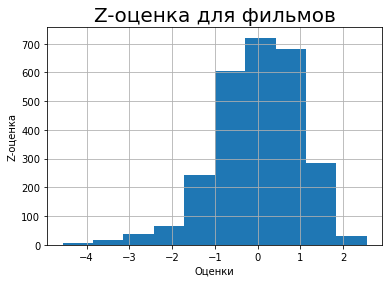

In [47]:
new['z-score'].hist()
plt.title('Z-оценка для фильмов', fontsize = 20)
plt.xlabel('Оценки')
plt.ylabel('Z-оценка')

По данному рисунку видно, что распределение обрывается на некоторых периодах значений, так как какие-то фильмы имеют очень низкие оценки, и только несколько фильмов в нашей бд имеют высокие оценки, в основном фильмы из 4 выбранных категорий имеют низкие оценки, особенно триллеры

Посмотрим, сколько фильмов из выбранных категорий хуже, чем 1 стандартное отклонение

In [48]:
new[new['z-score'] < -1]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр,z-score
7639,Round of Your Life,NaN,Family,2019,"June 21, 2019 (United States)",4.6,150.0,Dylan Thomas Ellis,Tim Ogletree,Cole Allen,United States,NaN,20941.0,Aristar Entertainment,91.0,NaN,Не для семейного просмотра,-2.194368
262,The Seduction,R,Thriller,1982,"January 29, 1982 (United States)",4.9,1100.0,David Schmoeller,David Schmoeller,Morgan Fairchild,United States,NaN,11378339.0,The Romantic Venture,104.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,-1.257212
838,Lune de miel,R,Thriller,1985,"November 20, 1985 (France)",4.6,100.0,Patrick Jamain,Robert Geoffrion,Nathalie Baye,France,NaN,NaN,Malofilm,98.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,-1.629720
1421,Party Line,R,Thriller,1988,October 1988 (United States),4.9,309.0,William Webb,Richard Brandes,Richard Hatch,United States,NaN,NaN,Westwind,91.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,-1.257212
6699,The Boy Next Door,R,Thriller,2015,"January 23, 2015 (United States)",4.7,40000.0,Rob Cohen,Barbara Curry,Jennifer Lopez,United States,4000000.0,52425855.0,Universal Pictures,91.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,-1.505551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7620,Shed of the Dead,R,Comedy,2019,"May 20, 2019 (United Kingdom)",4.7,1400.0,Drew Cullingham,Drew Cullingham,Spencer Brown,United Kingdom,NaN,38901.0,7DM Studios,82.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,-1.587473
7626,No Manches Frida 2,R,Comedy,2019,"March 15, 2019 (United States)",4.2,904.0,Nacho G. Velilla,Claudio Herrera,Martha Higareda,Mexico,NaN,26493648.0,Neverending Media,102.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра,-2.118761
7633,Tod@s Caen,PG-13,Comedy,2019,"August 30, 2019 (United States)",4.9,550.0,Ariel Winograd,Cory Brusseau,Martha Higareda,Mexico,NaN,9667157.0,Neverending Media,120.0,Детям до 13 лет просмотр не желателен,Не для семейного просмотра,-1.374958
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0,Детям до 13 лет просмотр не желателен,Не для семейного просмотра,-1.268701


Получаем, что фильмы жанра семейные имеют самые низкие оценки, но не имеющие рейтинга чтобы допустить для семейного просмотра

In [49]:
df_movies.to_pickle('/Users/rtt/DataScience/Goodfilms_for_family.pkl')
df = pd.read_pickle('/Users/rtt/DataScience/Goodfilms_for_family.pkl')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Желательно присутствие родителей,Для семейного просмотра
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Желательно присутствие родителей,Для семейного просмотра
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра


Поработаем с пропущенными значениями

In [50]:
df.isna().sum() 

name                    0
rating                 77
genre                   0
year                    0
released                2
score                   3
votes                   3
director                0
writer                  3
star                    1
country                 3
budget               2171
gross                 189
company                17
runtime                 4
Category rating        77
Семейный просмотр       0
dtype: int64

Заполним пропущенные значения в budget, для каждого года и каждого жанра 

In [51]:
t = df.groupby([df['year']])['budget'].transform('median')

In [52]:
df['budget_median'] = df['budget'].fillna(t)

In [53]:
df['budget'] = df['budget'].fillna(t)

In [54]:
del df['budget_median'] #удалим колонку 'budget_median'

Заполним пропущенные значения в gross, для каждого года и каждого жанра сформируя при этом массив

In [55]:
t1 = df.groupby([df['year']])['gross'].transform('median')

In [56]:
df['gross'] = df['gross'].fillna(t1) #перезапишем колонку gross

In [57]:
t2 = df.groupby([df['year']])['score'].transform('median') #функция для заполнения пустых значений медианным значением

In [58]:
df['score'] = df['score'].fillna(t2) #перезапишем колонку score

Так как в колонке рейтинг у нас есть незаполненные ячейки, укажем там, что несовершеннолетним зрителем можно смотреть кино только под родительским контролем 

In [59]:
df['rating'] = df['rating'].fillna('PG')

In [60]:
t3 = df.groupby([df['year']])['votes'].transform('median')
df['votes'] = df['votes'].fillna(t3)

In [61]:
df['writer'] = df['writer'].fillna('Cool man')

In [62]:
df['star'] = df['star'].fillna('Mega star')

In [63]:
df['company'] = df['company'].fillna('Warner Brother')

In [64]:
df['country'] = df['country'].fillna('United States')

In [65]:
df['runtime'] = df['runtime'].fillna('median')

In [66]:
df['Category rating'] = df['Category rating'].fillna('Детям до 13 лет просмотр не желателен')

Проверяем, все ли ячейки заполнены

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               7668 non-null   object  
 1   rating             7668 non-null   object  
 2   genre              7668 non-null   object  
 3   year               7668 non-null   int64   
 4   released           7666 non-null   object  
 5   score              7668 non-null   float64 
 6   votes              7668 non-null   float64 
 7   director           7668 non-null   object  
 8   writer             7668 non-null   object  
 9   star               7668 non-null   object  
 10  country            7668 non-null   object  
 11  budget             7668 non-null   float64 
 12  gross              7668 non-null   float64 
 13  company            7668 non-null   object  
 14  runtime            7668 non-null   object  
 15  Category rating    7668 non-null   category
 16  Семейн

In [68]:
df.to_pickle('/Users/rtt/DataScience/Goodfilms_Imputed1.pkl')

In [69]:
df = pd.read_pickle('/Users/rtt/DataScience/Goodfilms_Imputed1.pkl')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Желательно присутствие родителей,Для семейного просмотра
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Желательно присутствие родителей,Для семейного просмотра
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"Лица, не достигшие 16-летнего возраста, допуск...",Не для семейного просмотра
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,PG,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,166534027.0,Warner Brother,90.0,Детям до 13 лет просмотр не желателен,Не для семейного просмотра
7664,Dream Round,PG,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,7000000.0,166534027.0,Cactus Blue Entertainment,90.0,Детям до 13 лет просмотр не желателен,Не для семейного просмотра
7665,Saving Mbango,PG,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,166534027.0,Embi Productions,median,Детям до 13 лет просмотр не желателен,Не для семейного просмотра
7666,It's Just Us,PG,Drama,2020,"October 1, 2020 (United States)",6.3,1850.0,James Randall,James Randall,Christina Roz,United States,15000.0,166534027.0,Warner Brother,120.0,Детям до 13 лет просмотр не желателен,Не для семейного просмотра


# Корреляция

Корреляция между чистой прибылью и оценкой фильмов

In [70]:
df['score'].corr(df['gross'])

0.18530370723338552

Корреляция между бюджетом и оценкой фильма

In [71]:
df['budget'].corr(df['score'])

0.0784481052681679

Корреляция между годом выпуска и оценкой фильма

In [72]:
df['year'].corr(df['score'])

0.09787141669568081

In [73]:
df['score'].corr(df['votes'])

0.40917845069465664

Корреляция между оценкой фильмов и голосованием является самой сильной из всех выше приведенных корреляций. Это повод предположить, что оценка фильма зависит от количества голосовавших за него людей, и если коичество голосовавших очень мало, то получается, что оценка фильма может быть либо завышенной или заниженной

Сделаем визуализацию на графике для голосования и оценок

<AxesSubplot:xlabel='score', ylabel='votes'>

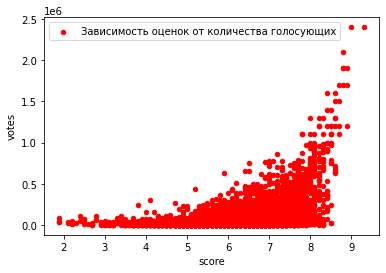

In [74]:
df.plot('score','votes', kind = 'scatter', color = 'red', label = 'Зависимость оценок от количества голосующих')

Через данную визуализацию можно увидеть, что кол-во высоких оценок ставит очень малый процент людей, а также, что люди имеют завышенные ожидания от фильмов, так как в большинстве своем люди склонны давать низкие оценки

<AxesSubplot:xlabel='year', ylabel='budget'>

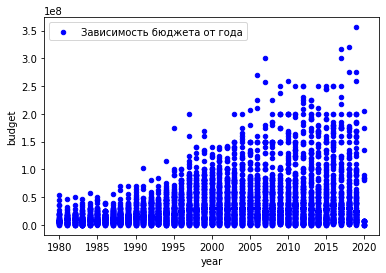

In [75]:
df.plot('year', 'budget', kind = 'scatter', color = 'blue', label = 'Зависимость бюджета от года')

<AxesSubplot:xlabel='budget', ylabel='runtime'>

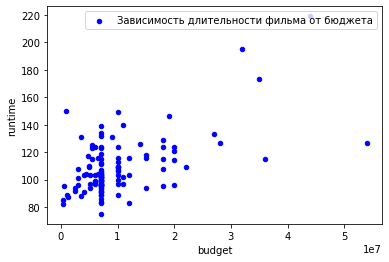

In [76]:
df[0:120].plot('budget','runtime' , kind = 'scatter', color = 'blue', label = 'Зависимость длительности фильма от бюджета')

Выведем корреляцию для всех количественных переменных

In [77]:
df.corr()

,year,score,votes,budget,gross
year,1.000000,0.097871,0.222435,0.351233,0.263183
score,0.097871,1.000000,0.409178,0.078448,0.185304
votes,0.222435,0.409178,1.000000,0.463390,0.631778
budget,0.351233,0.078448,0.463390,1.000000,0.740324
gross,0.263183,0.185304,0.631778,0.740324,1.000000


Везде наблюдаются положительные корреляции, самая устойчивая и большая положительная корреляция- это между чистой прибылью (gross) и бюджетом (budget), из этого можно сделать вывод, что на качество фильма для конечного потребителя очень многое влияет, но в большей степени бюджет, заложенный в фильм определяет его успешность в кинематографе , чистая прибыль (gross) и кол-во голосующих (votes) имеет среднюю кореляцию 0.64, люди больше голосуют за то что смотрят в кино

Посмотрим средне годовой чистый доход кинокомпаний по каждому году

In [78]:
year_gross = df.groupby(df['year'])['gross'].mean()
year_gross

year
1980    2.881364e+07
1981    2.348770e+07
1982    2.586929e+07
1983    2.024019e+07
1984    2.152794e+07
1985    1.945000e+07
1986    1.865715e+07
1987    2.052188e+07
1988    2.459226e+07
1989    3.086105e+07
1990    3.447145e+07
1991    3.145444e+07
1992    3.720286e+07
1993    4.038218e+07
1994    4.544183e+07
1995    4.743760e+07
1996    4.917173e+07
1997    6.563437e+07
1998    5.636371e+07
1999    6.801229e+07
2000    6.788355e+07
2001    7.808813e+07
2002    8.501718e+07
2003    8.830966e+07
2004    9.360874e+07
2005    8.933305e+07
2006    9.351702e+07
2007    1.019184e+08
2008    1.087536e+08
2009    1.166934e+08
2010    1.160173e+08
2011    1.244959e+08
2012    1.273810e+08
2013    1.299792e+08
2014    1.324574e+08
2015    1.339314e+08
2016    1.446942e+08
2017    1.424262e+08
2018    1.404264e+08
2019    1.522488e+08
2020    1.805456e+08
Name: gross, dtype: float64

По выведенной информации можно сделать вывод, что доход из года в год только растет

Построим столбчатую диаграмму для понимания в какой год средний чистый доход был выше у кинокомпаний

Text(0, 0.5, 'Доход , *10^8')

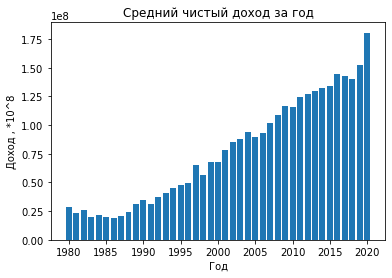

In [79]:
plt.bar(year_gross.index, year_gross)
plt.title('Cредний чистый доход за год')
plt.xlabel('Год')
plt.ylabel('Доход , *10^8')

Средний чистый доход был выше в 2020

Создадим категориальные переменные для удобной работы с данными

In [80]:
df['name'] = pd.Categorical(df['name'])

df['genre'] = pd.Categorical(df['genre'])

df['released'] = pd.Categorical(df['released'])

df['director'] = pd.Categorical(df['director'])

df['star'] = pd.Categorical(df['star'])

df['country'] = pd.Categorical(df['country'])

df['director'] = pd.Categorical(df['director'])

df['company'] = pd.Categorical(df['company'])

df['writer'] = pd.Categorical(df['writer'])


In [93]:
b1 = df[0:100]

Для всех категориальных переменных выявим распределение длительности кино(runtime) по переменным : 'year', 'score', 'votes', 'budget'

In [103]:
num_features = ['runtime']
cat = ['year', 'score', 'budget']
cat1 = ['votes']

Определим через pandas значения колонки runtime и соотнесем их с данными из массива данных cat

In [104]:
df_melted = pd.melt(b1, value_vars = cat, id_vars = 'runtime')
df_melted1 = pd.melt(b1, value_vars = cat1, id_vars = 'runtime')

Определим функцию для принятия данных из наших колонок по которым будет построено распределение

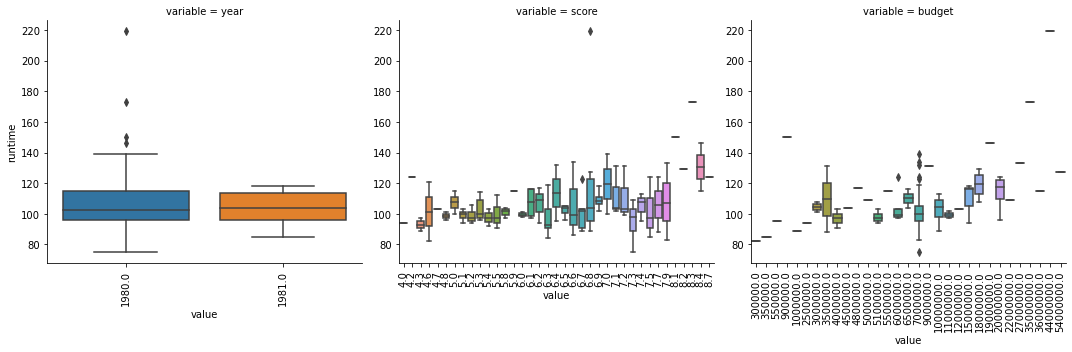

In [105]:
# def boxplot(x,y, **kwargs):
#     sns.boxplot(x=x, y=y)
#     x=plt.xticks(rotation=90)
# g = sns.FacetGrid(df_melted, col = "variable", col_wrap=2, height=5) # отображение на графике 
# g.map(boxplot, "value", "runtime")
def boxplot(x,y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
g = sns.FacetGrid(df_melted, col = "variable", col_wrap=3, sharex=False, sharey=False, height=5) # отображение на графике 
g.map(boxplot, "value", "runtime")

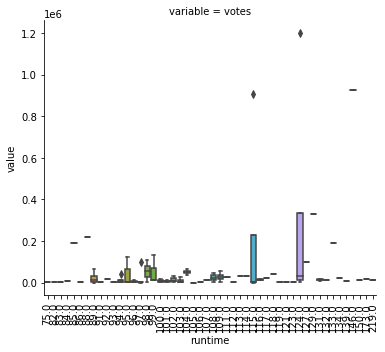

In [120]:
def boxplot(x,y, **kwargs):

    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
g = sns.FacetGrid(df_melted1, col = "variable", col_wrap=3, sharex=False, sharey=False, height=5) # отображение на графике 
g.map(boxplot,  "runtime","value")
# plt.title('Кол-во фильмов для семейного просмотра/несемейного просмотра', fontsize = 20)
# sns.barplot(y = df['Семейный просмотр'].index, x = df['Семейный просмотр'].values, alpha = 1)
# ax.containers

Если смотреть распределение длительности фильмов по годам, то тут можно увидеть, что в основном фильмы делались от 100 минут до 120, и в очень редких случаях(т.е. выбросы 220 или 80 минут). Распределение длительности фильма по оценкам(score) - здесь определяется тендеция, что обычно людям не хватает длительности фильма, а вот когда фильм составляет около 160 то тут оценки становятся около 8.7 Распределение длительности фильма по голосованию, выбросы-очень нечасто встречаемое явление 220 минут, но количество голосов среднее, а не минимальное, хотя 220 является достаточно длительным периодом. Распределение длительности фильма по бюджету, указывают, что кинокомпании не очень стремятся тратить деньги на высоко бюджетные фильмы длительностью более 160 минут, и этих фильмов очень мало, чтобы было сочетание и вложений больших капиталов и длительности более 140 минут

Выявляем интерквартильный размах для budget

In [121]:
df['budget'].describe()

count    7.668000e+03
mean     3.124935e+07
std      3.606750e+07
min      3.000000e+03
25%      1.060000e+07
50%      2.100000e+07
75%      3.500000e+07
max      3.560000e+08
Name: budget, dtype: float64

Сохраним значения 25% и 75% в переменные

In [122]:
q3 = np.percentile(df['budget'],75)
q1 = np.percentile(df['budget'],25)
print(q3,q1)

35000000.0 10600000.0


Расчитаем интерквартильный размах

In [123]:
iqr = q3-q1
print(iqr)

24400000.0


Найдем границу сверху и граница снизу для выбросов

In [124]:
iqr_bottom = q1 - 1.5*iqr
iqr_top = q3 + 1.5*iqr
print(iqr_bottom, iqr_top)

-26000000.0 71600000.0


Посмотрим, сколько выбросов выше верхней границы

In [125]:
df[df['budget'] > iqr_top].shape

(730, 17)

In [126]:
mean= df['budget'].mean()
std = df['budget'].std()
std_bottom = mean-2.5*std #среднеквадратичное отклонение для нижней границы
std_top = mean+2.5*std # среднеквадратичное отклонение для верхней границы
print(std_bottom, std_top)

-58919401.947913736 121418110.71969256


Получили границы репрезентативных значений
смотрим сколько значений будет выше верхнего порога(нижний не берем, он - 0 всегда)

In [127]:
df[df['budget'] > std_top].shape

(297, 17)

Количество значений выше среднеквадрастичного отклонения меньше, чем при интерквартильном размахе

Посмотрим меры центральной тендеции там, где нет выбросов

In [128]:
# без выбросов
iqr_no_outliers = df[df['budget'] <= iqr_top]['year']
std_no_outliers = df[df['budget'] <= std_top]['year']

In [129]:
# меры центральной тенденции
print(df['budget'].mean())
print(iqr_no_outliers.mean())
print(std_no_outliers.mean())

31249354.38588941
1999.5622657826464
1999.9696106362774


In [130]:
# как меняется медиана
print(df['budget'].median())
print(iqr_no_outliers.median())
print(std_no_outliers.median())

21000000.0
1999.0
2000.0


Можно сказать, что и медианное значение, и среднее значение-неустойчивые

# Хи-квадрат

Для начала сделаем категориальную переменную в БД (Семейный просмотр 1, Не для семейного просмотра -0) и построим гипотезу, не зависит ли от параметра "не для семейного просмотра"/"для семейного просмотра" параметры: чистая прибыль компании, длительность фильма, бюджет, оценка

In [131]:
df['Семейный просмотр'] = np.where((df['Category rating'] == 'Желательно присутствие родителей'),1, 0)
df['gross'] = np.where((df['gross'] > 20205760), 1, 0)
df['gross']

0       1
1       1
2       1
3       1
4       1
       ..
7663    1
7664    1
7665    1
7666    1
7667    1
Name: gross, Length: 7668, dtype: int32

Задаем уровень альфа 1%(вероятность ошибки)

In [132]:
alpha = 0.01

Построим таблицы сопряженности: не зависит ли от наличия возможности семейного просмотра прибыль компании

In [133]:
ct_o =  df.groupby('gross')['Семейный просмотр'].value_counts().unstack()
ct_o

Семейный просмотр,0,1
gross,,
0,3373,532
1,3043,720


Существуют 6408 фильмов , которые для не семейного просмотра и прибыль < 20205760 - 3373, 
фильмов для семейного просмотра и прибылью < 20205760 - 532 фильмов, для не семейного просмотра и прибыль > 20205760 - 3043, фильма для для семейного просмотра и прибыль > 20205760 -720 



In [134]:
dof = (2-1)*(2-1)#степень свободы(2 столбца -1)(2 строки-1)
dof

1

Общее количество наблюдений по рядам суммируем, и по колонкам critical_value - значение, при котором гипотеза будет опровержена

In [135]:
n_total = ct_o.sum().sum()
critical_value = 6.63  # для каждой степени свободы есть свое значение критического значения
n_total

7668

In [106]:
# складываем по столбцу значения кол-ва фильмов для несемейного просмотра
n_target_0 = ct_o[0].sum() 
# складываем по столбцу значения кол-ва фильмов для семейного просмотра
n_target_1 = ct_o[1].sum()
print(n_target_0, n_target_1)

6416 1252


In [107]:
p_target_0 = n_target_0/n_total
p_target_1 = n_target_1/n_total
print(p_target_0, p_target_1)

0.8367240479916537 0.16327595200834638


Получаем, что 84% вероятности для попадания в категорию 0(не для семейного просмотра, 16% вероятности для попадания в категорию 1(для семейного просмотра). Посчитаем количество фильмов для прибыли больше 20205760 и для прибыли меньше 20205760


In [108]:
n_films_m_142 = ct_o.iloc[0].sum()
n_films_b_142 = ct_o.iloc[1].sum()
print(n_films_m_142, n_films_b_142)

3905 3763


Получилось, что количество фильмов с чистым доходом < 20205760 - 3905, а количество фильмов с чистым доходом > 20205760 - 3763

In [109]:
f_e_target_m1_142 = n_films_m_142 * p_target_0
f_e_target_m12_142 = n_films_m_142 * p_target_1
print(f_e_target_m1_142,f_e_target_m12_142)

3267.4074074074074 637.5925925925926


Количество фильмов не для семейного просмотра с чистым доходом <  20205760 - 3267, а
количество фильмов  для семейного просмотра с чистым доходом <  20205760 - 637

In [110]:
f1_e_target_b1_142 = n_films_b_142 * p_target_0
f1_e_target_b12_142 = n_films_b_142 * p_target_1
print(f1_e_target_b1_142,f1_e_target_b12_142)

3148.5925925925926 614.4074074074074


Количество фильмов  не для семейного просмотра с чистым доходом >  20205760 - 3148,
количество фильмов  для семейного просмотра с чистым доходом >  20205760 - 614.
Составляем матрицу, где в первой строке фильмы с прибылью до 20205760, во второй - с прибылью после 20205760 

In [111]:
ct_e = np.array([[f_e_target_m1_142, f_e_target_m12_142],[f1_e_target_b1_142, f1_e_target_b12_142]])
print(ct_e) # печатаем матрицу, где в первой строке фильмы с прибылью до 20205760, во второй - с прибылью после 20205760 

[[3267.40740741  637.59259259]
 [3148.59259259  614.40740741]]


Получили матрицу частот для вычисления хи квадрат

In [112]:
chi_square = ((ct_o - ct_e)**2 / ct_e).sum().sum()
print(chi_square, critical_value) # печатаем значения критического значения и хи-квадрата
print(chi_square> critical_value) # печатаем значение булева выражения

42.58819934583668 6.63
True


Теперь сделаем подсчет хи квадрата с помощью встроенной ф-ции и сравним результат

In [113]:
scipy.stats.chi2_contingency(ct_o, correction= False)

(42.58819934583668,
 6.756578265886029e-11,
 1,
 array([[3267.40740741,  637.59259259],
        [3148.59259259,  614.40740741]]))

Наш хи квадрать меньше 6.63, поэтому гипотеза, что чистый доход компаний не зависит от выпуска семейных фильмов, подтверждается

In [114]:
df_2000 = df[0:3835] # делаем отображение до 2000 года включительно, посмотрим на соотношения рейтинга и длительности фильма

<AxesSubplot:xlabel='Семейный просмотр'>

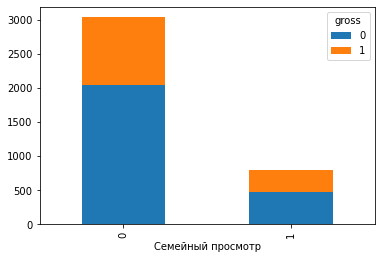

In [115]:
df_2000.groupby('Семейный просмотр')['gross'
                              ].value_counts().unstack().plot(kind = 'bar', stacked = True)

In [120]:
df_1 = df[7000:7669]

<AxesSubplot:xlabel='Семейный просмотр'>

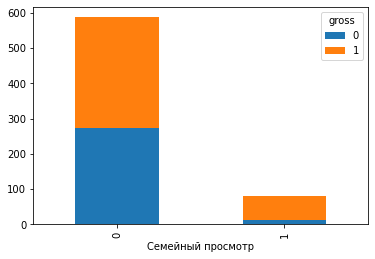

In [124]:
df_1.groupby('Семейный просмотр')['gross'
                              ].value_counts().unstack().plot(kind = 'bar', stacked = True)

Из этих двух диаграмм можно сделать вывод, что чистый доход от фильмов увеличился (вне зависимости были ли эти фильмы для семейного просмотра или нет)
после 2000 года чистый доход фильмов для семейного просмотра вырос, но количество таких фильмов уменьшилось

In [126]:
df1 = df[0:250] #первые 15 строк БД с компаниями снимавшими фильмы
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,1,Warner Bros.,146.0,"Лица, не достигшие 16-летнего возраста, допуск...",0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,1,Columbia Pictures,104.0,"Лица, не достигшие 16-летнего возраста, допуск...",0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,1,Lucasfilm,124.0,Желательно присутствие родителей,1
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,1,Paramount Pictures,88.0,Желательно присутствие родителей,1
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,1,Orion Pictures,98.0,"Лица, не достигшие 16-летнего возраста, допуск...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Summer Lovers,R,Comedy,1982,"July 16, 1982 (United States)",5.7,3900.0,Randal Kleiser,Randal Kleiser,Peter Gallagher,United States,10600000.0,0,Filmways Pictures,98.0,"Лица, не достигшие 16-летнего возраста, допуск...",0
246,Victor Victoria,PG,Comedy,1982,"March 19, 1982 (United States)",7.6,20000.0,Blake Edwards,Blake Edwards,Julie Andrews,United Kingdom,10600000.0,1,Metro-Goldwyn-Mayer (MGM),134.0,Желательно присутствие родителей,1
247,The Last Unicorn,G,Animation,1982,"November 19, 1982 (United States)",7.4,25000.0,Jules Bass,Peter S. Beagle,Jeff Bridges,United Kingdom,3500000.0,0,Rankin/Bass Productions,92.0,Нет возрастных ограничений,0
248,The Entity,R,Drama,1982,"February 4, 1983 (United States)",6.7,15000.0,Sidney J. Furie,Frank De Felitta,Barbara Hershey,United States,9000000.0,0,American Cinema Productions,125.0,"Лица, не достигшие 16-летнего возраста, допуск...",0


<AxesSubplot:xlabel='genre'>

<Figure size 1440x720 with 0 Axes>

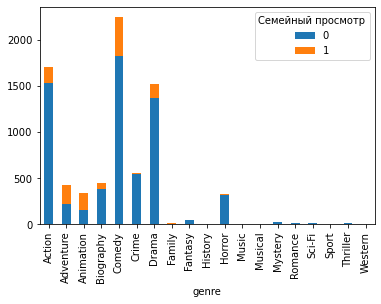

In [129]:
plt.figure(figsize = (20,10))
df.groupby('genre')['Семейный просмотр'].value_counts().unstack().plot(kind = 'bar', stacked = True,sharex= True )

Самыми снимаемыми фильмами являются комедии - больше 2000 штук(из них 1700 фильмов с чистым доходом меньше 20205760), на втором месте фильмы жанра Экшен - 1700 штук (1500 с чистым доходом меньше 20205760 ), 3 место- Драмы 1500 штук, вне зависимости от годов, эти жанры всегда на пике востребованности

# Доверительные интервалы

In [ ]:
plt.title("Распределение длительности фильма от количества фильмов" )
#df[0:400]['runtime'].plot()
sns.barplot(y= df[0:400]['name'].values, x = df[0:400]['runtime'].values, alpha=1)
plt.xlabel('Кол-во фильмов')
plt.ylabel('Длительность, минуты')
ax.containers

<AxesSubplot:title={'center':'Распределение значение оценки'}, xlabel='Оценки', ylabel='Количество фильмов'>

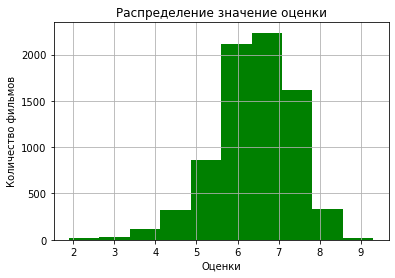

In [130]:
plt.title('Распределение значение оценки')
plt.xlabel('Оценки')
plt.ylabel('Количество фильмов')
df['score'].hist(color= "green")

Получаем следующее распределение оценок - самая частая оценка- 6.5

In [205]:
import seaborn as sns #визуализация
import scipy.special as sps
from scipy import *
from scipy import stats
from scipy.stats import kurtosis #коэффициент эксцесса (КЭ)
from scipy.stats import skew #коэффициент ассиметрии (КА)(смещение графика в доль оси x)
#Если курт и скью оба блтже к нулю, то распределение нормальное 
import statsmodels.api as sm #оценка стат.моделей
import matplotlib.pyplot as plt

In [206]:
def my_basic_research(df = df, column = 'score'):
    print ('Базовые метрики: ')
    print (df[column].describe())
    print ('---------------')
    
    print ('Самые популярные значения метрики, топ 5')
    print (df[column].value_counts().nlargest(5))
    print ('-------------')
    
    print ('КЭ', kurtosis(df[column]))
    print ('КА', skew (df[column]))
    
    sns.displot(df[column])
    plt.title('Распределение метрик')

Базовые метрики: 
count    7668.000000
mean        6.390376
std         0.968654
min         1.900000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: score, dtype: float64
---------------
Самые популярные значения метрики, топ 5
6.6    359
6.4    351
6.2    346
6.7    332
6.5    331
Name: score, dtype: int64
-------------
КЭ 0.8926472963991614
КА -0.6043209861241137


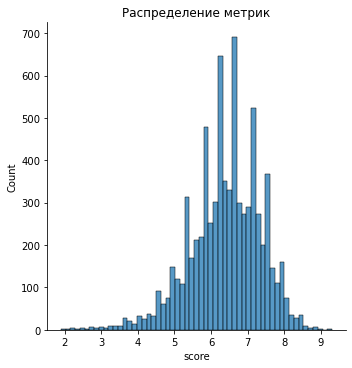

In [207]:
my_basic_research(df = df, column = 'score')

Из проведенных операций получаем, что самые популярные значения оценок - это 6.5 баллов за фильм , а кол-во фильмов, получивших такие отметки, равно 359

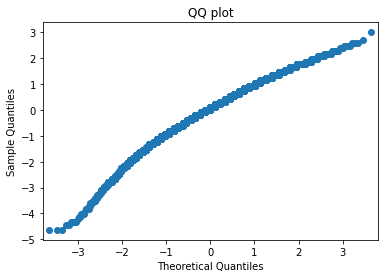

In [208]:
sm.qqplot(df['score'], fit = True)
plt.title ('QQ plot')
plt.show() #под 45 градусов - данные распределены по нормальному закону Гаусса

Отрицательные значения в нашем случае можно отделить, так как миимальной оценкой в нашем случае может быть только 0, если обратить внимание на положительные цифры по обеим осям то увидим что оценка постоянно возрастает в распределении. Вывод из этого можно сделать что оценки распределены  около 3 баллов(среднее значение от оценки 6)

Нормальное распределение

In [209]:
def my_norm_confidence (df=df, column = 'score', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

In [210]:
my_norm_confidence()

(3.895288938805695, 8.885462234903203)

Нормальное распределение колеблется между отметками 3.8 и 8.9

In [211]:
confidence = my_norm_confidence()

Text(0.5, 1.0, 'Доверительный интервал')

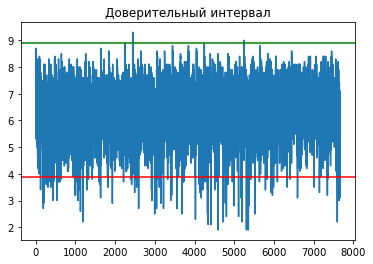

In [212]:
df.score.plot(color = "green")
plt.axhline(y = confidence[1], color = 'g', linestyle = '-') #горизонатльная линия параллельная оси X
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Доверительный интервал')

Получаем, что минимальное значение доверительного интервала около 4, максимальное - около 9

Выясним количество аномально больших значений оценок

In [213]:
df['Anomaly_big'] = np.where(df['score'] > confidence [1], 1,0)
df[df['Anomaly_big'] == 1].describe()

,year,score,votes,budget,gross,Семейный просмотр,Anomaly_big
count,5.000000,5.000000,5.000000e+00,5.000000e+00,5.0,5.0,5.0
mean,1998.400000,9.000000,1.920000e+06,6.680000e+07,1.0,0.0,1.0
std,6.730527,0.173205,5.069517e+05,7.403175e+07,0.0,0.0,0.0
min,1993.000000,8.900000,1.200000e+06,8.000000e+06,1.0,0.0,1.0
25%,1994.000000,8.900000,1.700000e+06,2.200000e+07,1.0,0.0,1.0
50%,1994.000000,8.900000,1.900000e+06,2.500000e+07,1.0,0.0,1.0
75%,2003.000000,9.000000,2.400000e+06,9.400000e+07,1.0,0.0,1.0
max,2008.000000,9.300000,2.400000e+06,1.850000e+08,1.0,0.0,1.0


Выясним количество аномально маленьких значений оценок

In [214]:
df['Anomaly_small'] = np.where(df['score'] < confidence [0], 1,0)
df[df['Anomaly_small'] == 1].describe()

,year,score,votes,budget,gross,Семейный просмотр,Anomaly_big,Anomaly_small
count,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.0,118.0
mean,1998.567797,3.278814,25580.330508,2.347362e+07,0.338983,0.313559,0.0,1.0
std,11.125914,0.529288,31609.672977,2.310218e+07,0.475383,0.465918,0.0,0.0
min,1981.000000,1.900000,18.000000,7.000000e+03,0.000000,0.000000,0.0,1.0
25%,1988.000000,3.000000,4825.000000,9.500000e+06,0.000000,0.000000,0.0,1.0
50%,1998.500000,3.500000,17000.000000,1.750000e+07,0.000000,0.000000,0.0,1.0
75%,2007.000000,3.700000,36000.000000,2.575000e+07,1.000000,1.000000,0.0,1.0
max,2020.000000,3.800000,238000.000000,1.250000e+08,1.000000,1.000000,0.0,1.0


Получаем 118 штук аномально маленьких значений

Определим функцию для поиска аномалий

In [109]:
def find_anomaly (df = df, column = 'score'): 
    upper_level = df[column].mean() + 3*df[column].std()
    lower_level = df[column].mean() - 3*df[column].std()
    anomaly = df [(df[column] > upper_level)| (df[column] < upper_level)]
    return upper_level, lower_level, anomaly

In [110]:
anomaly = find_anomaly (df = df, column = 'score') # поиск аномалии производится в колонке оценка

In [111]:
print(anomaly[0], anomaly[1])

9.29693587966327 3.4838860381449246


Получаем, что аномально высокой оценкой является оценка 9.3, а аномально низкой -3.5

In [218]:
df['Anomaly_big'] = np.where(df['score'] > anomaly [0], 1,0)
df[df['Anomaly_big'] == 1]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр,Anomaly_big,Anomaly_small
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,1,Castle Rock Entertainment,142.0,"Лица, не достигшие 16-летнего возраста, допуск...",0,1,0


Сейчас просмотрели, как выглядят данные для аномально высокой оценки, значит высоко была оценена драма 1994 года, где был писатель Стивен Кинг и звездой Тим Роббинс, компания Castle Rock Entertainment	, фильм не предназначался для лиц младше 16 лет 

In [219]:
df['Anomaly_small'] = np.where(df['score'] < anomaly [1], 1,0)
df[df['Anomaly_small'] == 1] #определение выбросов через принцип 3-х сигм

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Category rating,Семейный просмотр,Anomaly_big,Anomaly_small
120,Tarzan the Ape Man,Approved,Adventure,1981,"July 24, 1981 (United States)",3.4,5300.0,John Derek,Tom Rowe,Bo Derek,United States,6500000.0,1,Metro-Goldwyn-Mayer (MGM),115.0,Одобрен,0,0,1
190,Inchon,PG,Drama,1981,"September 17, 1982 (United States)",2.7,659.0,Terence Young,Robin Moore,Laurence Olivier,South Korea,46000000.0,0,One Way Productions,140.0,Желательно присутствие родителей,1,0,1
198,Scream,R,Horror,1981,"January 1, 1981 (United States)",2.9,674.0,Byron Quisenberry,Byron Quisenberry,Pepper Martin,United States,10000000.0,0,Calendar International Pictures,82.0,"Лица, не достигшие 16-летнего возраста, допуск...",0,0,1
427,The Lonely Lady,R,Drama,1983,"September 30, 1983 (United States)",3.0,938.0,Peter Sasdy,Harold Robbins,Pia Zadora,United States,5000000.0,0,Harold Robbins International Company,92.0,"Лица, не достигшие 16-летнего возраста, допуск...",0,0,1
528,Bolero,R,Comedy,1984,"August 31, 1984 (United States)",3.0,5100.0,John Derek,John Derek,Bo Derek,United States,7000000.0,0,City Films,105.0,"Лица, не достигшие 16-летнего возраста, допуск...",0,0,1
991,Shanghai Surprise,PG-13,Adventure,1986,"August 29, 1986 (United States)",3.2,5000.0,Jim Goddard,John Kohn,Sean Penn,United Kingdom,17000000.0,0,HandMade Films,97.0,Детям до 13 лет просмотр не желателен,0,0,1
1000,Hardbodies 2,R,Comedy,1986,"September 12, 1986 (United States)",3.2,1100.0,Mark Griffiths,Mark Griffiths,James Karen,United States,12000000.0,0,Chroma III Productions,88.0,"Лица, не достигшие 16-летнего возраста, допуск...",0,0,1
1067,Jaws: the Revenge,PG-13,Adventure,1987,"July 17, 1987 (United States)",3.0,42000.0,Joseph Sargent,Peter Benchley,Lorraine Gary,United States,23000000.0,1,Universal Pictures,89.0,Детям до 13 лет просмотр не желателен,0,0,1
1104,Teen Wolf Too,PG,Comedy,1987,"November 20, 1987 (United States)",3.4,11000.0,Christopher Leitch,Jeph Loeb,Jason Bateman,United States,3000000.0,0,Atlantic Entertainment Group,95.0,Желательно присутствие родителей,1,0,1
1125,The Garbage Pail Kids Movie,PG,Adventure,1987,"August 22, 1987 (United States)",2.6,7600.0,Rod Amateau,Linda Palmer,Anthony Newley,United States,1000000.0,0,Atlantic Entertainment Group,100.0,Желательно присутствие родителей,1,0,1


Из списка аномально низких оценок можно сделать вывод что фильмов , которые зритель низко оценил, гораздо больше, чем аномально высоких оценок, при этом низкие оценки получали и такие   известные компании как Уорнер Бразерс, а аномально высокую оценку получила неизвестная компания для широкого круга, но вложившая средний бюджет для всех компаний

Построим распределение по правилу 3 сигм

In [112]:
upper_level = df['score'].mean() + 3*df['score'].std()
lower_level = df['score'].mean() - 3*df['score'].std()
print(upper_level,lower_level )

9.29693587966327 3.4838860381449246


Определим критические точки 3сигм (красная линия минимальное значение, зеленая -максимальное значение)

Text(0.5, 1.0, '3 sigma')

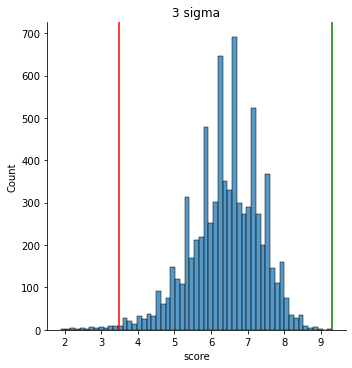

In [221]:
sns. displot (df ['score'])
plt.axvline(x = anomaly [0], color = 'g', linestyle = '-') # вертикальная зеленая линия параллельная оси X
plt.axvline(x = anomaly [1], color = 'r', linestyle = '-') # вертикальная красная линия параллельная оси X
plt.title('3 sigma')

На графике можно увидеть, что 6.6 оценка встречается в 700 фильмах, это еще раз подтверждает гипотезу что 6.6 -это оценка которую ставят наиболее часто, правило 3 сигм подтверждает что правильно найдены и аномально высокая, и низкая оценки в предыдущих вычислениях.